In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [16]:
# Read in csv file

csv1 = "1900_thru_1950.csv"
csv2 = "1951_thru_2021.csv"

data1 = pd.read_csv(csv1)
data2 = pd.read_csv(csv2)

In [17]:
# Create dataframes of raw precipitation data

data1_df = pd.DataFrame(data1)

data1_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
0,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-01,2.50,"1,,,0"
1,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-02,3.16,",,,0"
2,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-03,3.23,",,,0"
3,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-04,4.11,",,,0"
4,USC00312270,"DAYBOOK, NC US",35.983330,-82.3,716.9,1949-05,4.75,",,,0"
...,...,...,...,...,...,...,...,...
30264,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1919-11,3.04,",,,6"
30265,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1919-12,1.65,",,,6"
30266,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1920-01,NaN,NaN
30267,USC00311760,"CHIMNEY ROCK, NC US",35.433333,-82.2,609.6,1920-02,4.80,",,,6"


In [18]:
data2_df = pd.DataFrame(data2)

data2_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES
0,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-04,6.43,",,,N"
1,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-05,2.54,",,,N"
2,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-06,4.99,",a,,N"
3,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-07,7.11,",,,N"
4,US1NCPT0058,"GREENVILLE 4.9 SE, NC US",35.552057,-77.311168,20.4,2014-08,6.04,",,,N"
...,...,...,...,...,...,...,...,...
109488,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2020-11,6.64,"2,,,N"
109489,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2020-12,5.57,"1,,,N"
109490,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2021-01,3.96,"3,,,N"
109491,US1NCCR0136,"BEAUFORT 3.8 N, NC US",34.775990,-76.665290,2.1,2021-02,10.81,",,,N"


In [19]:
# Merge dataframes on "Station" column

raw_prec_df = pd.merge(data1_df,data2_df, on="STATION", how="outer")

raw_prec_df

,STATION,NAME_x,LATITUDE_x,LONGITUDE_x,ELEVATION_x,DATE_x,PRCP_x,PRCP_ATTRIBUTES_x,NAME_y,LATITUDE_y,LONGITUDE_y,ELEVATION_y,DATE_y,PRCP_y,PRCP_ATTRIBUTES_y
0,USC00312270,"DAYBOOK, NC US",35.98333,-82.3,716.9,1949-01,2.5,"1,,,0","DAYBOOK, NC US",35.98333,-82.30000,716.9,1951-01,1.75,",,,0"
1,USC00312270,"DAYBOOK, NC US",35.98333,-82.3,716.9,1949-01,2.5,"1,,,0","DAYBOOK, NC US",35.98333,-82.30000,716.9,1951-02,2.06,",,,0"
2,USC00312270,"DAYBOOK, NC US",35.98333,-82.3,716.9,1949-01,2.5,"1,,,0","DAYBOOK, NC US",35.98333,-82.30000,716.9,1951-03,4.69,",a,,0"
3,USC00312270,"DAYBOOK, NC US",35.98333,-82.3,716.9,1949-01,2.5,"1,,,0","DAYBOOK, NC US",35.98333,-82.30000,716.9,1951-04,3.97,",,,0"
4,USC00312270,"DAYBOOK, NC US",35.98333,-82.3,716.9,1949-01,2.5,"1,,,0","DAYBOOK, NC US",35.98333,-82.30000,716.9,1951-05,1.62,",,,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16290903,US1NCCR0136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-11,6.64,"2,,,N"
16290904,US1NCCR0136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2020-12,5.57,"1,,,N"
16290905,US1NCCR0136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-01,3.96,"3,,,N"
16290906,US1NCCR0136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BEAUFORT 3.8 N, NC US",34.77599,-76.66529,2.1,2021-02,10.81,",,,N"


In [4]:
# Group data by year

print(raw_prec_df["DATE"].unique())

prec_groupby_year = raw_prec_df.groupby("DATE")

['2021-02' '2019-02' '2017-02' '2015-02' '2013-02' '2011-02' '2009-02']


In [5]:
# Use sum method to calculate total measured precipitation by year

total_annual_prec = prec_groupby_year["PRCP"].sum()

total_annual_prec

DATE
2009-02     725.23
2011-02    1018.11
2013-02    2233.09
2015-02    2031.15
2017-02     755.43
2019-02    3596.71
2021-02    4904.66
Name: PRCP, dtype: float64

In [6]:
# Reset index

total_annual_prec = total_annual_prec.reset_index()

In [7]:
# Convert total annual measured precipitation to dataframe

total_annual_prec_df = pd.DataFrame(total_annual_prec)

total_annual_prec_df.DATE.replace({"-02": ""}, regex=True)

total_annual_prec_df

,DATE,PRCP
0,2009-02,725.23
1,2011-02,1018.11
2,2013-02,2233.09
3,2015-02,2031.15
4,2017-02,755.43
5,2019-02,3596.71
6,2021-02,4904.66


In [8]:
total_annual_prec_df.dtypes

DATE     object
PRCP    float64
dtype: object

Text(0.5, 0, 'Years')

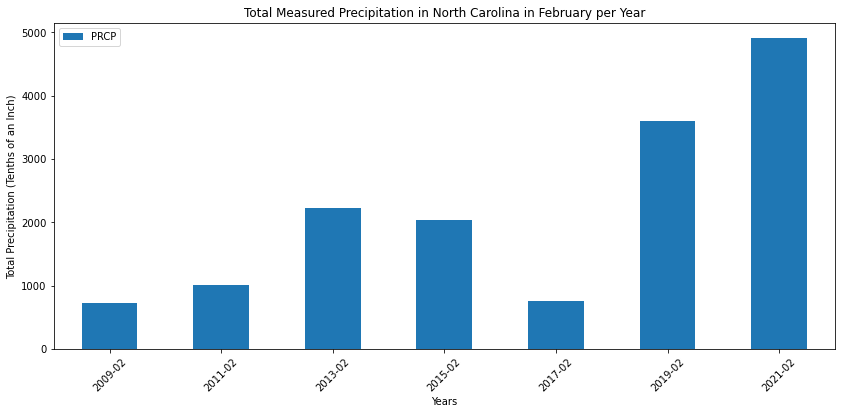

In [9]:
# Plot bar graph

bar_prec = total_annual_prec_df.plot(kind="bar", figsize = (14,6))

plt.title("Total Measured Precipitation in North Carolina in February per Year")

bar_prec.set_xticklabels(total_annual_prec_df["DATE"], rotation = 45)

plt.ylabel("Total Precipitation (Tenths of an Inch)")

plt.xlabel("Years")


In [10]:
# matplotlib available styles

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [11]:
# Plot scatter plot

scatter_prec = total_annual_prec_df.plot(kind="scatter", figsize = (14,6))

ValueError: scatter requires an x and y column